In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#scikit-learn for preprocessing and modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#scikit-learn Model Selection for tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/Student_performance_data _.csv')
print("Full dataset shape is {}".format(df.shape))
print(df.head())

Full dataset shape is (2392, 15)
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196

In [ ]:
# Add sum of Extracurricular activities as new feature

df['TotalExtras'] = df[['Extracurricular', 'Sports', 'Music', 'Volunteering']].sum(axis=1)

In [ ]:
# Setting categorical features as categories
df['Gender']= df['Gender'].astype('category')
df['Tutoring'] = df['Tutoring'].astype('category')
df['Extracurricular'] = df['Extracurricular'].astype('category')
df['Sports'] = df['Sports'].astype('category')
df['Music'] = df['Music'].astype('category')
df['Volunteering'] = df['Volunteering'].astype('category')
df['GradeClass'] = df['GradeClass'].astype('category')

df['Ethnicity'] = df['Ethnicity'].astype('category')
df['ParentalEducation'] = df['ParentalEducation'].astype('category')
df['ParentalSupport'] = df['ParentalSupport'].astype('category')

df['ParentalInvolvement'] = df['ParentalEducation'].cat.codes + df['ParentalSupport'].cat.codes


# Ethnicity: 0: Caucasian, 1: African American, 2: Asian, 3: Other
# Parental Education: 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher
# Parental Support: 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   StudentID            2392 non-null   int64   
 1   Age                  2392 non-null   int64   
 2   Gender               2392 non-null   category
 3   Ethnicity            2392 non-null   category
 4   ParentalEducation    2392 non-null   category
 5   StudyTimeWeekly      2392 non-null   float64 
 6   Absences             2392 non-null   int64   
 7   Tutoring             2392 non-null   category
 8   ParentalSupport      2392 non-null   category
 9   Extracurricular      2392 non-null   category
 10  Sports               2392 non-null   category
 11  Music                2392 non-null   category
 12  Volunteering         2392 non-null   category
 13  GPA                  2392 non-null   float64 
 14  GradeClass           2392 non-null   category
 15  TotalExtras          

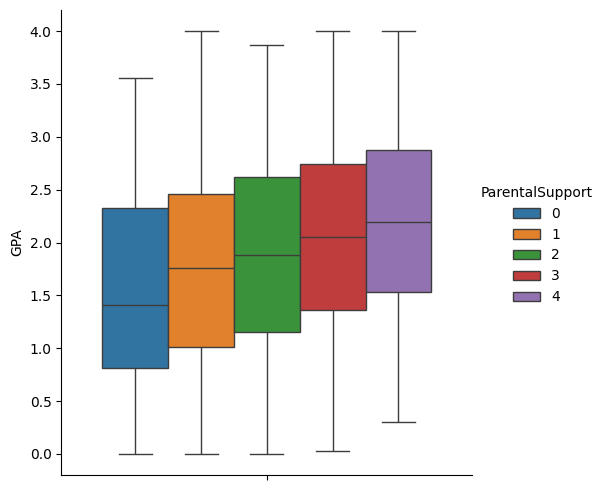

In [ ]:
sns.catplot(data=df,
            kind='box',
            y='GPA',
            hue='ParentalSupport')

<p>As parental support increases, so does the median GPA, but there is a lot of variation which will make it difficult to use this in the models.<p>

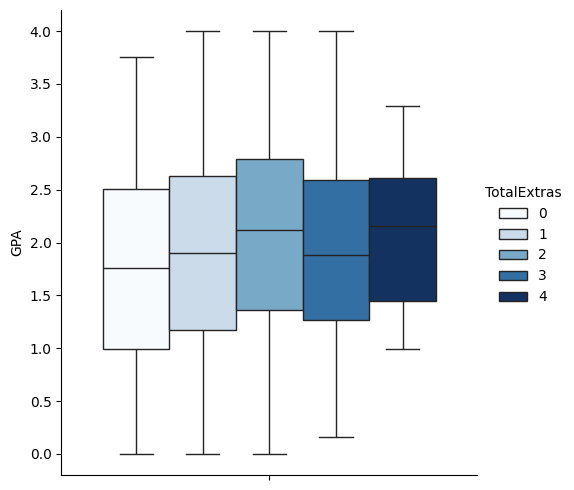

In [ ]:
sns.catplot(data=df,
            kind='box',
            y="GPA",
            hue='TotalExtras',
            palette='Blues')

<p>Here we see that the number of extracuricular activities

"df[df['Age'] == 15].plot(kind='scatter', x='StudyTimeWeekly', y='GPA')\nplt.show()"

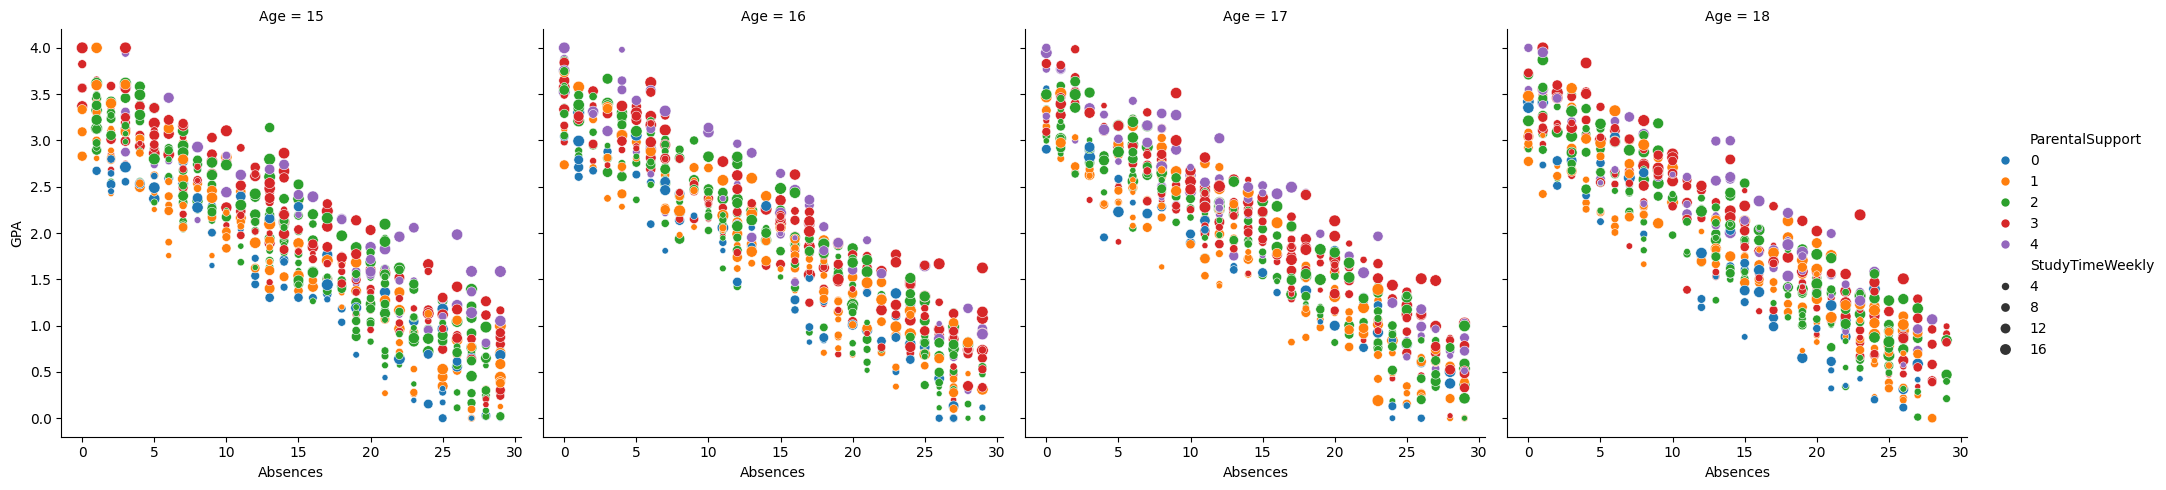

In [ ]:
sns.relplot(data=df,
            kind='scatter',
            x='Absences',
            y='GPA',
            size='StudyTimeWeekly',
            hue='ParentalSupport',
            col='Age')

'''df[df['Age'] == 15].plot(kind='scatter', x='StudyTimeWeekly', y='GPA')
plt.show()'''

<p>This visualization shows a clear trend between the number of ascences and a student's GPA: as the absences go up, the GPA goes down. No amount of studying or parental support can offset the effect of 30 absences.</p>

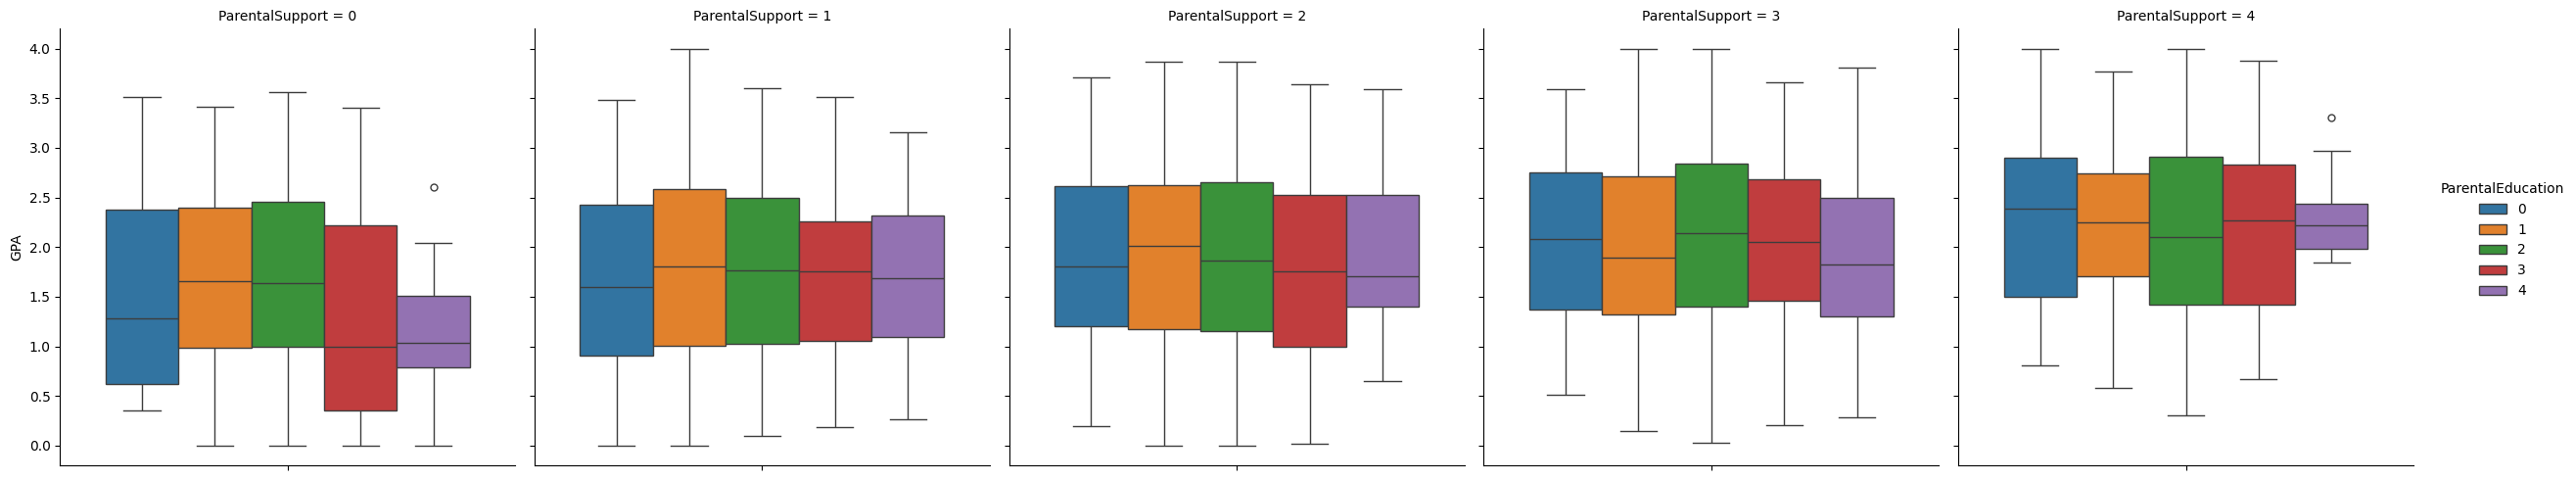

In [ ]:
sns.catplot(data=df,
            kind='box',
            y='GPA',
            hue='ParentalEducation',
            col='ParentalSupport'
            )

<p>Here I found that as the parental involvement went up, so did the median GPA of the student. It also shows that Parental Education level isn't as important as Parental Support.</p>

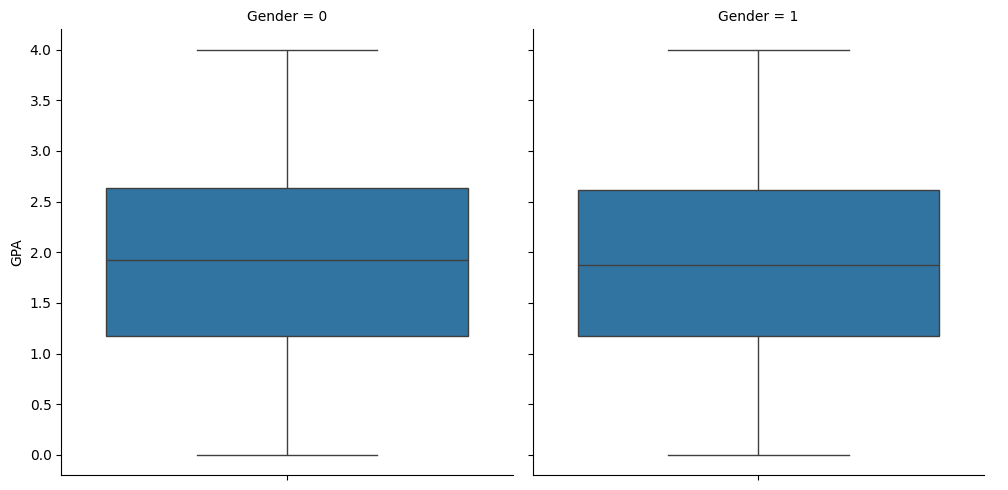

In [ ]:
sns.catplot(
    data=df,
    kind='box',
    y='GPA',
    col='Gender'
)

There is no correlation between gender and GPA

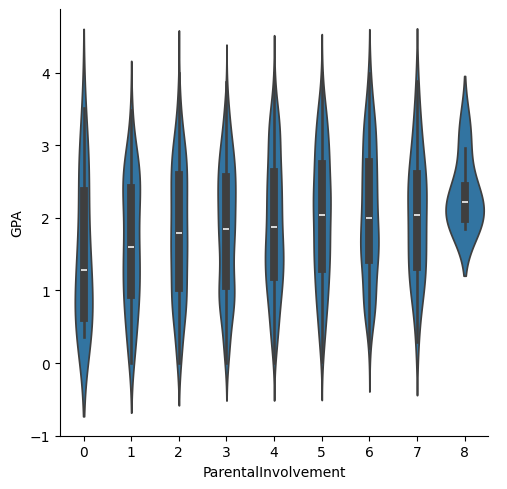

In [ ]:
sns.catplot(
    data=df,
    kind='violin',
    y='GPA',
    x='ParentalInvolvement'
)

Students from parents with more support and higher education tend to do better

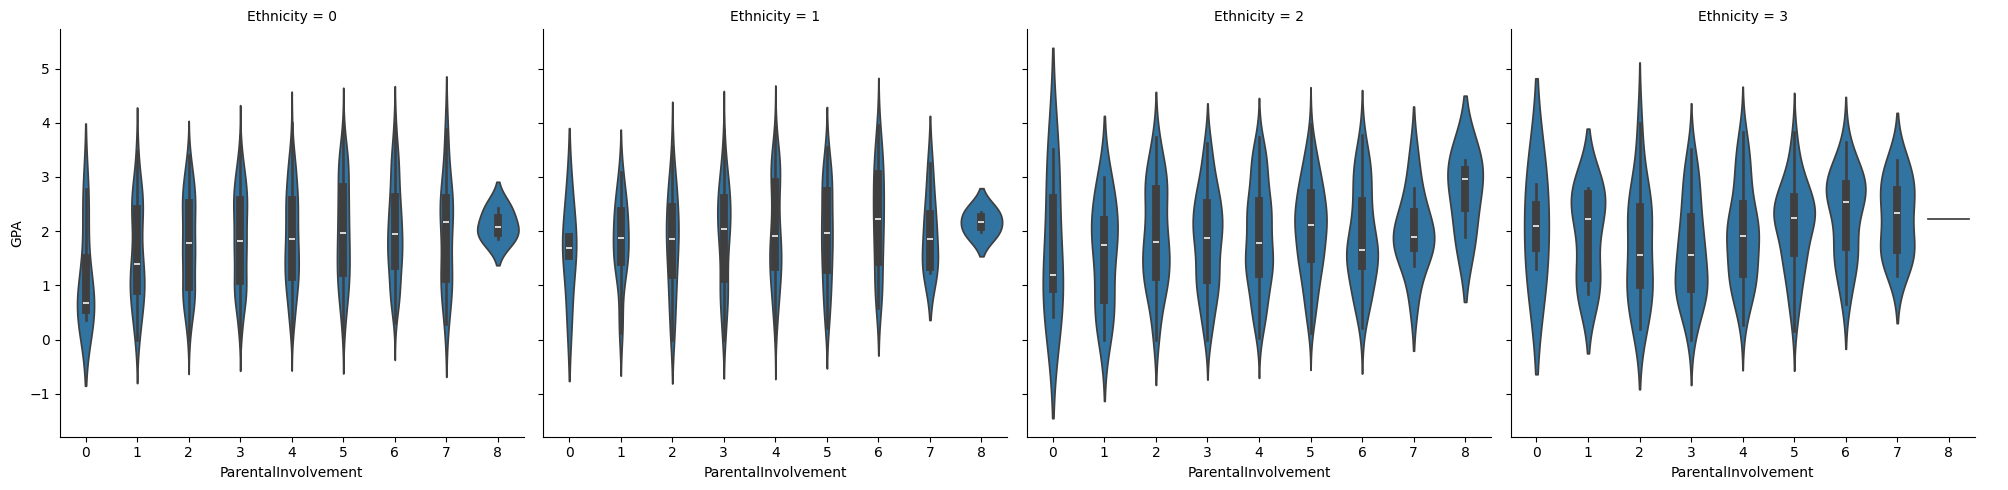

In [ ]:
sns.catplot(
    data=df,
    kind='violin',
    y='GPA',
    x='ParentalInvolvement',
    col='Ethnicity'
)
#0: Caucasian
#1: African American
#2: Asian
#3: Other

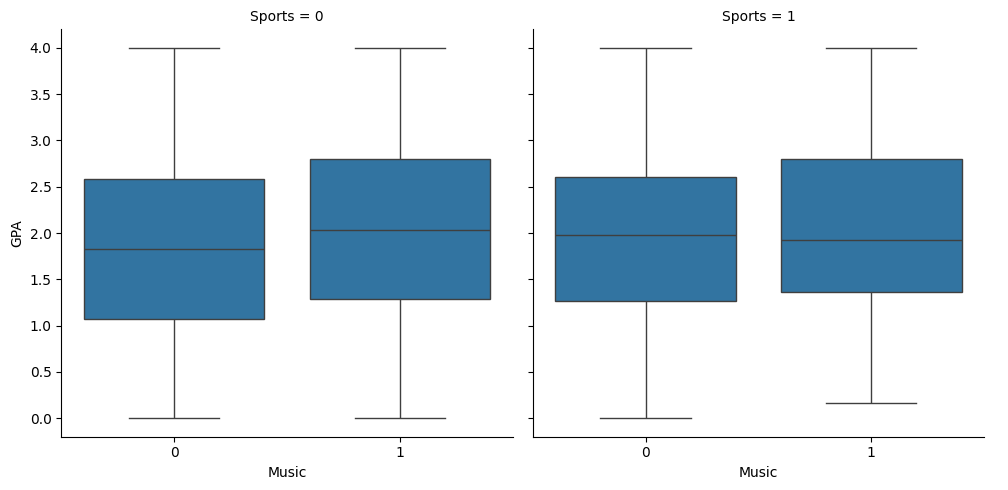

In [ ]:
sns.catplot(data=df,
            kind='box',
            y='GPA',
            x='Music',
            col='Sports'
            )







In [ ]:
# Train and Test Linear Regression

# Prepare training data
y = df['GPA']
X = df[['Age', 'Absences', 'ParentalSupport', 'ParentalEducation', 'TotalExtras']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Fit LR to training data
lr = LinearRegression().fit(X_train, y_train)

# Create predictions
lrPred = lr.predict(X_test)

# Find R2 adn RMSE of predictions
r2 = r2_score(y_test, lrPred)
rmse = mean_squared_error(y_test, lrPred, squared=False)

print('The r2 is: ', r2)
print('The RMSE is: ', rmse)

The r2 is:  0.8933860878291909
The RMSE is:  0.2941509201062525


In [ ]:
# Train and Test Decision Tree Regressor

# Prepare training data
y = df['GPA']
X = df.drop(['StudentID', 'GPA', 'GradeClass'], axis=1)

# Split training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Create and fit Decision Tree Regressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)

# Generate predictions
dtrPred = dtr.predict(X_test)

# Find R2 adn RMSE of predictions
r2 = r2_score(y_test, dtrPred)
rmse = mean_squared_error(y_test, dtrPred, squared=False)

print('The r2 is: ', r2)
print('The RMSE is: ', rmse)

The r2 is:  0.8609801082095216
The RMSE is:  0.3417694067015003


In [ ]:
# Train Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

y = df['GPA']
X = df.drop(columns=['GPA', "StudentID", "GradeClass"], axis=1)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and fit Random Forest Regressor
rfr = RandomForestRegressor().fit(X_train, y_train)

#Generate Predictions
rfrPred =  rfr.predict(X_test)


# Find R2 adn RMSE of predictions
r2 = r2_score(y_test, rfrPred)
rmse = mean_squared_error(y_test, rfrPred, squared=False)

print('The r2 is: ', r2)
print('The RMSE is: ', rmse)


The r2 is:  0.9309461509180471
The RMSE is:  0.23896208889752887


In [ ]:
# Get params from our models

print("Linear Regression: ", lr.get_params())
print("Decision Tree Regressor: ", dtr.get_params())
print("Random Forest Regressor: ", rfr.get_params())

Linear Regression:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Decision Tree Regressor:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Random Forest Regressor:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Tune the Decision Tree

# Prepare parameter lists
dtr_params = {'max_depth':[4, 5, 6, 7],
              'min_samples_leaf':[0.02, 0.04, 0.08, 0.12, 0.16, 0.20, 0.24],
              'criterion':  ['poisson', 'squared_error', 'friedman_mse']}

# Prepare training data
y = df['GPA']
X = df.drop(['StudentID', 'GPA', 'GradeClass'], axis=1)

# Split training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Instantiate a 3-fold CV grid search object
grid_dtr = GridSearchCV(estimator=dtr,
                        param_grid=dtr_params,
                        scoring='neg_mean_squared_error',
                        cv=3,
                        verbose=1,
                        n_jobs=-1)

# Fit grid search to the training data
grid_dtr.fit(X_train, y_train)

gridDTRPred = grid_dtr.predict(X_test)
r2 = r2_score(y_test, gridDTRPred)

# Extract best options
print("Best parameters: ", grid_dtr.best_params_)
print("Best RMSE score: ", grid_dtr.best_score_ * -1)
print("R2: ", r2)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
Best parameters:  {'criterion': 'poisson', 'max_depth': 7, 'min_samples_leaf': 0.02}
Best RMSE score:  0.10795007206426487
R2:  0.8774342901467403


In [ ]:
# Tune the Random Forest

# Prepare parameter lists
rfr_params = {'max_depth':[5, 6, 7, 8],
              'min_samples_leaf':[0.02, 0.04, 0.08, 0.12],
              'max_features':[8, 9, 10, 11, 12]}

# Prepare training data
y = df['GPA']
X = df.drop(['StudentID', 'GPA', 'GradeClass'], axis=1)

# Split training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Instantiate a 3-fold CV grid search object
grid_rfr = GridSearchCV(estimator=rfr,
                        param_grid=rfr_params,
                        scoring='neg_mean_squared_error',
                        cv=3,
                        verbose=1,
                        n_jobs=-1)

# Fit grid search to the training data
grid_rfr.fit(X_train, y_train)

gridRFRPred = grid_rfr.predict(X_test)
r2 = r2_score(y_test, gridRFRPred)

# Extract best options
print("Best parameters: ", grid_rfr.best_params_)
print("Best RMSE score: ", grid_rfr.best_score_ * -1)
print("R2: ", r2)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best parameters:  {'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 0.02}
Best RMSE score:  0.08300518191279277
R2:  0.900878737437702


<p>After tuning the models, I found that the Random Forest Regressor had the highest performance with an R2 or 0.90 and an RMSE of 0.08.</p>
<p>These numbers beat out both the Linear Regressor and Decision Tree Regressor, so I have chosen the Random Forest Regressors as my ideal model.</p>

In [ ]:
# Create test data

age = 17
gender = 1
ethnicity = 3
parEdu = 4
studyTime = 5.00
absences = 2
tutoring = 1
parSupp = 2
extra = 0
sports = 1
music = 1
volunteering = 0
totalExtras = 2
parInv = 6

prediction = grid_rfr.predict([[age, gender, ethnicity, parEdu, studyTime, absences, tutoring, parSupp, extra, sports, music, volunteering, totalExtras, parInv]])

print("Prediction is: ", prediction)

Prediction is:  [3.02805824]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
